In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../out.csv")

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
stats = list(df.columns)[2:]

In [5]:
sns.set(rc={'figure.facecolor':'white'})
plt.rcParams['savefig.dpi'] = 300

In [6]:
df = df[~((df["model"]=="SGD1")|(df["model"]=="SGD2")|(df["model"]=="SGD3"))]

In [7]:
# df = df[(df["elapsed"])]

In [8]:
# df = df[(df["mse"]<12552.223633)]

In [9]:
# df[(df["model"]=="linstorch")&(df["mse"]>0)].max()

In [10]:
df[(df["model"]=="linstorch")]["elapsed"].mean()

nan

In [11]:
df[(df["model"]=="Adagrad3")]["elapsed"].mean()

0.05889235734939571

In [12]:
df[(df["model"]=="Adagrad5")]["elapsed"].mean()

0.09462707996368405

In [13]:
df[(df["model"]=="Adagrad7")]["mse"].mean()

0.3193673448

In [14]:
df[(df["model"]=="linstorch")]["mse"].mean()

nan

In [15]:
list(df["model"].unique())

['linear_regression',
 'linstorch(0.3843)',
 'linstorch(0.3817632653061224)',
 'linstorch(0.37922653061224487)',
 'linstorch(0.3766897959183673)',
 'linstorch(0.37415306122448977)',
 'linstorch(0.3716163265306122)',
 'linstorch(0.36907959183673467)',
 'linstorch(0.3665428571428571)',
 'linstorch(0.36400612244897956)',
 'linstorch(0.361469387755102)',
 'linstorch(0.35893265306122446)',
 'linstorch(0.3563959183673469)',
 'linstorch(0.35385918367346936)',
 'linstorch(0.3513224489795918)',
 'linstorch(0.34878571428571425)',
 'linstorch(0.3462489795918367)',
 'linstorch(0.34371224489795915)',
 'linstorch(0.3411755102040816)',
 'linstorch(0.33863877551020405)',
 'linstorch(0.33610204081632655)',
 'linstorch(0.33356530612244895)',
 'linstorch(0.33102857142857145)',
 'linstorch(0.32849183673469384)',
 'linstorch(0.32595510204081635)',
 'linstorch(0.32341836734693874)',
 'linstorch(0.32088163265306124)',
 'linstorch(0.31834489795918364)',
 'linstorch(0.31580816326530614)',
 'linstorch(0.3132714

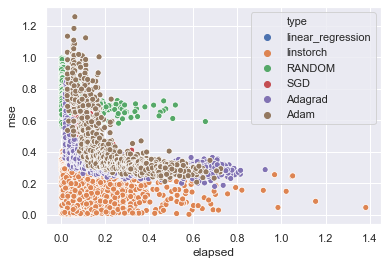

In [16]:
sns.scatterplot(x="elapsed", y="mse", hue='type', data=df)
plt.show()

In [17]:
df.groupby("model")["mse"].mean().head(100)

model
Adagrad1                          0.555723
Adagrad10                         0.310379
Adagrad11                         0.303018
Adagrad12                         0.302549
Adagrad13                         0.300034
                                    ...   
linstorch(0.31073469387755104)    0.250338
linstorch(0.3132714285714286)     0.253367
linstorch(0.31580816326530614)    0.258837
linstorch(0.31834489795918364)    0.250539
linstorch(0.32088163265306124)    0.259279
Name: mse, Length: 100, dtype: float64

In [18]:
df.groupby("model")["type"].head()

0        linear_regression
1                linstorch
2                linstorch
3                linstorch
4                linstorch
               ...        
12601                 Adam
12602                 Adam
12603                 Adam
12604                 Adam
12605                 Adam
Name: type, Length: 621, dtype: object

In [19]:
len(df.groupby("model")["mse"].mean())

125

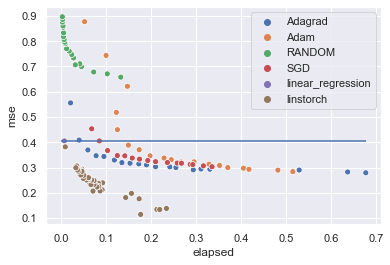

In [20]:
sns.scatterplot(x=df.groupby("model")["elapsed"].mean(), y=df.groupby("model")["mse"].mean(), hue=list(map(lambda x: x[0], df.groupby("model")["type"].unique().values)))
plt.hlines(df[df["model"]=="linear_regression"]["mse"], 0, df.groupby("model")["elapsed"].mean().max())

plt.show()

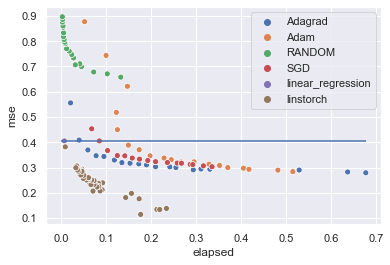

In [21]:
sns.scatterplot(x=df.groupby("model")["elapsed"].mean(), y=df.groupby("model")["mse"].mean(), hue=list(map(lambda x: x[0], df.groupby("model")["type"].unique().values)))
plt.hlines(df[df["model"]=="linear_regression"]["mse"], 0, df.groupby("model")["elapsed"].mean().max())

plt.savefig("outm/elapsed_mse_scatter.png")

In [22]:
df.groupby("model")[["elapsed","mse"]].mean().head(100)

,elapsed,mse
model,,
Adagrad1,0.020297,0.555723
Adagrad10,0.189366,0.310379
Adagrad11,0.209562,0.303018
Adagrad12,0.241361,0.302549
Adagrad13,0.254946,0.300034
...,...,...
linstorch(0.31073469387755104),0.067163,0.250338
linstorch(0.3132714285714286),0.060992,0.253367
linstorch(0.31580816326530614),0.057337,0.258837


In [23]:
# sns.scatterplot(x=df[(df["model"]=="Adagrad3")]["elapsed"], y=df[(df["model"]=="Adagrad3")]["mse"])
# sns.scatterplot(x=df[(df["model"]=="linstorch")]["elapsed"], y=df[(df["model"]=="linstorch")]["mse"])
# plt.show()

In [24]:
for stat in stats:
    if stat == "type": continue
    plt.subplots(figsize=(15,15))
    # ax = sns.violinplot(x="model", y=stat, data=df)
    # fig = ax.get_figure()
    # fig.savefig("out/" + stat + '_swarm.png')
    ax = sns.boxplot(x="model", y=stat, data=df, showfliers=False)
    ax = sns.swarmplot(x="model", y=stat, data=df, color=".25", s = 2)
    # if stat=="mse": plt.hlines(0.8453290438010049, 0, 100)
    plt.xticks(rotation=45)
    plt.savefig("outm/" + stat + '_swarm.png')

In [ ]:
df.groupby("model")["mse"].std()

model
Adagrad1                          0.130819
Adagrad10                         0.072229
Adagrad11                         0.043501
Adagrad12                         0.071187
Adagrad13                         0.044919
                                    ...   
linstorch(0.37415306122448977)    0.057925
linstorch(0.3766897959183673)     0.051651
linstorch(0.37922653061224487)    0.050350
linstorch(0.3817632653061224)     0.059661
linstorch(0.3843)                 0.046272
Name: mse, Length: 125, dtype: float64